In [ ]:
# importing the dependecies
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# checking the availability of gpu
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device:{device}")

Using device:cpu


In [ ]:
# loading the dataset
df = pd.read_csv('/content/fashion-mnist_train.csv')

In [ ]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(10000, 785)

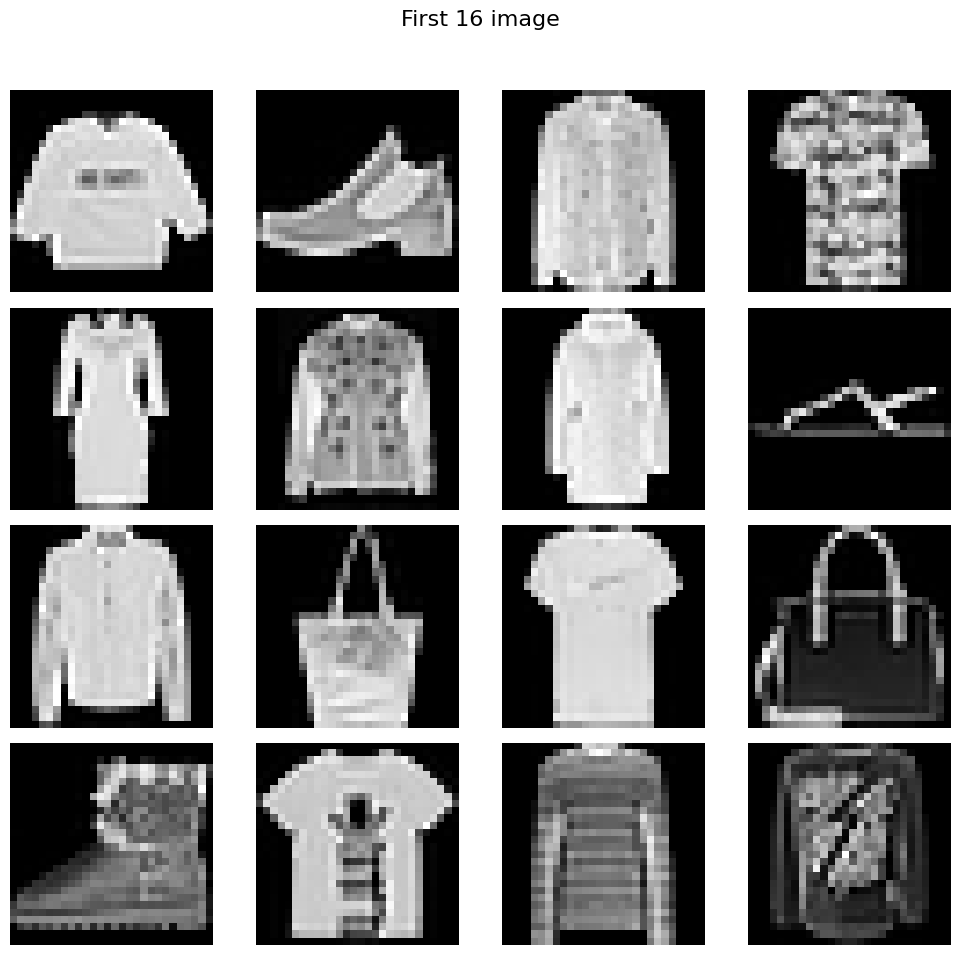

In [ ]:
fig,axes = plt.subplots(4,4,figsize=(10,10))
plt.suptitle("First 16 image",fontsize=16)

# plot first 16 image from dataset
for i,ax in enumerate(axes.flat):
    img = df.iloc[i,1:].values.reshape(28,28)
    ax.imshow(img, cmap='gray')
    ax.axis('off')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
# separating the features and target
x = df.drop(columns=['label'],axis=1)
y = df['label']

In [ ]:
x

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,5,0,0,...,0.0,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,1,2,0,0,0,0,0,...,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,0,0,0,0,1,0,0,0,33,126,...,122.0,115.0,51.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
467,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
468,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
469,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,2.0,0.0,1.0,99.0,102.0,79.0,0.0,0.0


In [ ]:
y

,label
0,2
1,9
2,6
3,0
4,3
...,...
466,0
467,3
468,9
469,9


In [ ]:
# train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# scaling the image
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
# defini